## Lab3
#### Name: Zeng Yuhang
#### ID: 222320008
#### variant: 8

**1. Investigate features of my variant**

- Draw histograms for features
- analyze answer behavior on the plot of feature values versus the answer of the regression model
- write comments about my investigation

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv('./variants/8/forestfires.csv')

month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'dec', 'oct', 'nov']
day = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# change month and day into integer
for i, j in enumerate(month):
    df['month'].replace(j, i + 1, inplace=True)
for i, j in enumerate(day):
    df['day'].replace(j, i + 1, inplace=True)

# use logarithm transform to enlarge the distance between the answers around 0
df['area'] = df['area'].apply(np.log1p)

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,11,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,11,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [32]:
x, y = df.shape
print(x, y)

517 13


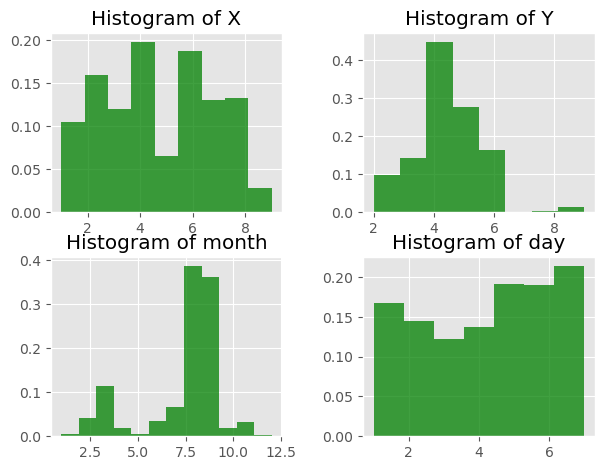

In [33]:
plt.figure()

plt.subplot(221)
plt.hist(df['X'], 9, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of X')
plt.grid(True)

plt.subplot(222)
plt.hist(df['Y'], 8, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of Y')
plt.grid(True)

plt.subplot(223)
plt.hist(df['month'], 12, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of month')
plt.grid(True)

plt.subplot(224)
plt.hist(df['day'], 7, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of day')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

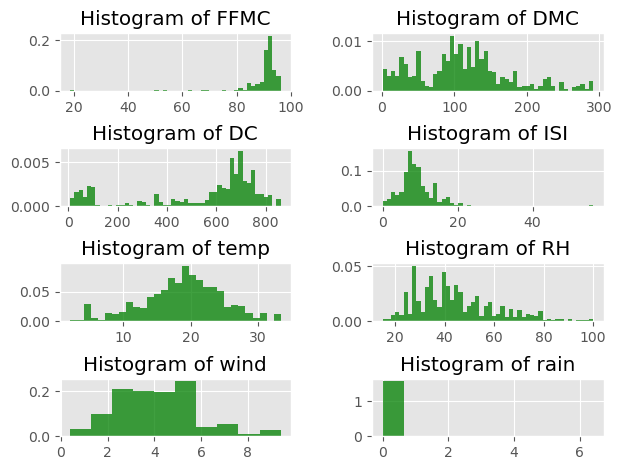

In [34]:
plt.figure()

plt.subplot(421)
plt.hist(df['FFMC'], 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of FFMC')
plt.grid(True)

plt.subplot(422)
plt.hist(df['DMC'], 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of DMC')
plt.grid(True)

plt.subplot(423)
plt.hist(df['DC'], 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of DC')
plt.grid(True)

plt.subplot(424)
plt.hist(df['ISI'], 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of ISI')
plt.grid(True)

plt.subplot(425)
plt.hist(df['temp'], 30, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of temp')
plt.grid(True)

plt.subplot(426)
plt.hist(df['RH'], 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of RH')
plt.grid(True)

plt.subplot(427)
plt.hist(df['wind'], 10, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of wind')
plt.grid(True)

plt.subplot(428)
plt.hist(df['rain'], 10, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of rain')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1, wspace=0.35)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

X = df.loc[:, 'X': 'rain']
Y = df.loc[:, 'area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 42)

X_train.shape, X_test.shape

((465, 12), (52, 12))

In [87]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

coef = reg.coef_
intercept = reg.intercept_

coef, intercept

(array([ 0.03023082,  0.01163999,  0.11687144, -0.01259282,  0.00638886,
         0.00253766, -0.00088087, -0.02693015,  0.00626252, -0.00245283,
         0.04255925,  0.09730649]),
 -0.22329341232144984)

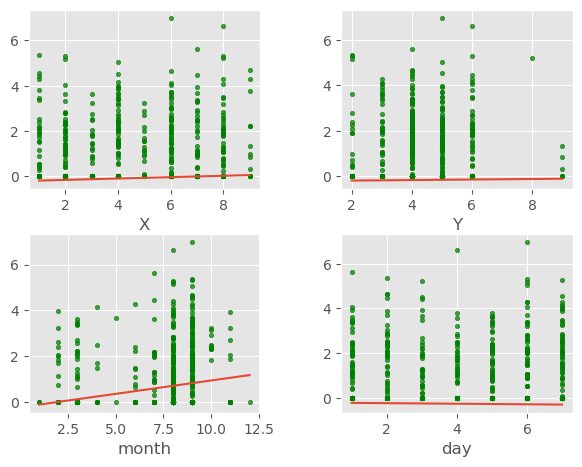

In [88]:
plt.figure()

plt.subplot(221)
plt.scatter(df['X'], df['area'], s=10, color='g', alpha=0.75)
X = np.linspace(1, 9, 1000)
plt.plot(X, intercept + coef[0] * X)
plt.xlabel('X')
plt.grid(True)

plt.subplot(222)
plt.scatter(df['Y'], df['area'], s=10, color='g', alpha=0.75)
X = np.linspace(2, 9, 1000)
plt.plot(X, intercept + coef[1] * X)
plt.xlabel('Y')
plt.grid(True)

plt.subplot(223)
plt.scatter(df['month'], df['area'], s=10, color='g', alpha=0.75)
X = np.linspace(1, 12, 1000)
plt.plot(X, intercept + coef[2] * X)
plt.xlabel('month')
plt.grid(True)

plt.subplot(224)
plt.scatter(df['day'], df['area'], s=10, color='g', alpha=0.75)
X = np.linspace(1, 7, 1000)
plt.plot(X, intercept + coef[3] * X)
plt.xlabel('day')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

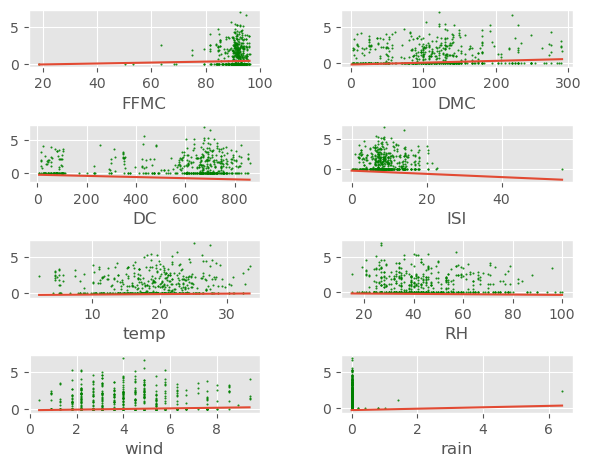

In [89]:
plt.figure()

plt.subplot(421)
plt.scatter(df['FFMC'], df['area'], s=1, color='g', alpha=0.75)
plt.xlabel('FFMC')
X = np.linspace(18.7, 96.20, 1000)
plt.plot(X, intercept + coef[4] * X)
plt.grid(True)

plt.subplot(422)
plt.scatter(df['DMC'], df['area'], s=1, color='g', alpha=0.75)
X = np.linspace(1.1, 291.3, 1000)
plt.plot(X, intercept + coef[5] * X)
plt.xlabel('DMC')
plt.grid(True)

plt.subplot(423)
plt.scatter(df['DC'], df['area'], s=1, color='g', alpha=0.75)
X = np.linspace(7.9, 860.6, 1000)
plt.plot(X, intercept + coef[6] * X)
plt.xlabel('DC')
plt.grid(True)

plt.subplot(424)
plt.scatter(df['ISI'], df['area'], s=1, color='g', alpha=0.75)
X = np.linspace(0.0, 56.10, 1000)
plt.plot(X, intercept + coef[7] * X)
plt.xlabel('ISI')
plt.grid(True)

plt.subplot(425)
plt.scatter(df['temp'], df['area'], s=1, color='g', alpha=0.75)
X = np.linspace(2.2, 33.30, 1000)
plt.plot(X, intercept + coef[8] * X)
plt.xlabel('temp')
plt.grid(True)

plt.subplot(426)
plt.scatter(df['RH'], df['area'], s=1, color='g', alpha=0.75)
X = np.linspace(15.0, 100, 1000)
plt.plot(X, intercept + coef[9] * X)
plt.xlabel('RH')
plt.grid(True)

plt.subplot(427)
plt.scatter(df['wind'], df['area'], s=1, color='g', alpha=0.75)
X = np.linspace(0.40, 9.40, 1000)
plt.plot(X, intercept + coef[10] * X)
plt.xlabel('wind')
plt.grid(True)

plt.subplot(428)
plt.scatter(df['rain'], df['area'], s=1, color='g', alpha=0.75)
X = np.linspace(0.0, 6.4, 1000)
plt.plot(X, intercept + coef[11] * X)
plt.xlabel('rain')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1, wspace=0.35)
plt.show()

- What features are most useful for solving the problem and why?
  Month is the most useful feature because it has large absolute value of the slope and distribute reasonable.
- How features are distributed in the data?
  It is really difficult to find some pattern of data distribution with eyes. However, there still have some features distribute very distinctive:
  1. Y 7-9 area habe very few records of forest fires.
  2. The area of forest fires increase until September, then decrease when winter comes.
  3. Forest fires always appear when FFMC is high, ISI is low and rain is nearly 0.

**2. Investigate the API of linear models in scikit-learn and train a model for my task**

done above, model name 'reg'

**3. Estimate the results of training**

In [90]:
from sklearn.metrics import mean_squared_error , r2_score
#预测模型
reg.predict(X_test)
#打印截距
print('intercept_:%.3f' % reg.intercept_)
#打印模型系数
for i, coef in enumerate(reg.coef_):
    print('coef_%d:%.3f' % (i, coef))
#打印均方误差值
print('Mean squared error: %.3f' % mean_squared_error(Y_test,reg.predict(X_test)))##((Y_test-reg.predict(X_test))**2).mean()
#打印R-平方
print('Variance score: %.3f' % r2_score(Y_test,reg.predict(X_test)))
#1-((Y_test-reg.predict(X_test))**2).sum()/((Y_test - Y_test.mean())**2).sum
#打印准确率accuracy
print('score: %.3f' % reg.score(X_test,Y_test))

intercept_:-0.223
coef_0:0.030
coef_1:0.012
coef_2:0.117
coef_3:-0.013
coef_4:0.006
coef_5:0.003
coef_6:-0.001
coef_7:-0.027
coef_8:0.006
coef_9:-0.002
coef_10:0.043
coef_11:0.097
Mean squared error: 2.117
Variance score: 0.034
score: 0.034


**4. Try to change parameters of training to achieve better results**

In [70]:
# fit_intercept

lr = linear_model.LinearRegression(fit_intercept=False)
lr.fit(X_train, Y_train)

#打印均方误差值
print('Mean squared error: %.3f' % mean_squared_error(Y_test,lr.predict(X_test)))##((Y_test-lr.predict(X_test))**2).mean()
#打印R-平方
print('Variance score: %.3f' % r2_score(Y_test,lr.predict(X_test)))
#1-((Y_test-lr.predict(X_test))**2).sum()/((Y_test - Y_test.mean())**2).sum
#打印准确率accuracy
print('score: %.3f' % lr.score(X_test,Y_test))

Mean squared error: 2.117
Variance score: 0.035
score: 0.035


In [71]:
# copy_X

lr = linear_model.LinearRegression(copy_X=False)
lr.fit(X_train, Y_train)

#打印均方误差值
print('Mean squared error: %.3f' % mean_squared_error(Y_test,lr.predict(X_test)))##((Y_test-lr.predict(X_test))**2).mean()
#打印R-平方
print('Variance score: %.3f' % r2_score(Y_test,lr.predict(X_test)))
#1-((Y_test-lr.predict(X_test))**2).sum()/((Y_test - Y_test.mean())**2).sum
#打印准确率accuracy
print('score: %.3f' % lr.score(X_test,Y_test))

Mean squared error: 2.117
Variance score: 0.034
score: 0.034


In [72]:
# positive

lr = linear_model.LinearRegression(positive=True)
lr.fit(X_train, Y_train)

#打印均方误差值
print('Mean squared error: %.3f' % mean_squared_error(Y_test,lr.predict(X_test)))##((Y_test-lr.predict(X_test))**2).mean()
#打印R-平方
print('Variance score: %.3f' % r2_score(Y_test,lr.predict(X_test)))
#1-((Y_test-lr.predict(X_test))**2).sum()/((Y_test - Y_test.mean())**2).sum
#打印准确率accuracy
print('score: %.3f' % lr.score(X_test,Y_test))

Mean squared error: 2.130
Variance score: 0.029
score: 0.029


In [73]:
# Ridge

lr = linear_model.Ridge(alpha=.5)
lr.fit(X_train, Y_train)

#打印均方误差值
print('Mean squared error: %.3f' % mean_squared_error(Y_test,lr.predict(X_test)))##((Y_test-lr.predict(X_test))**2).mean()
#打印R-平方
print('Variance score: %.3f' % r2_score(Y_test,lr.predict(X_test)))
#1-((Y_test-lr.predict(X_test))**2).sum()/((Y_test - Y_test.mean())**2).sum
#打印准确率accuracy
print('score: %.3f' % lr.score(X_test,Y_test))

Mean squared error: 2.117
Variance score: 0.034
score: 0.034


In [74]:
# Lasso

lr = linear_model.Lasso(alpha=0.1)
lr.fit(X_train, Y_train)

#打印均方误差值
print('Mean squared error: %.3f' % mean_squared_error(Y_test,lr.predict(X_test)))##((Y_test-lr.predict(X_test))**2).mean()
#打印R-平方
print('Variance score: %.3f' % r2_score(Y_test,lr.predict(X_test)))
#1-((Y_test-lr.predict(X_test))**2).sum()/((Y_test - Y_test.mean())**2).sum
#打印准确率accuracy
print('score: %.3f' % lr.score(X_test,Y_test))

Mean squared error: 2.178
Variance score: 0.007
score: 0.007


In [75]:
# LassoLars

lr = linear_model.LassoLars(alpha=.1)
lr.fit(X_train, Y_train)

#打印均方误差值
print('Mean squared error: %.3f' % mean_squared_error(Y_test,lr.predict(X_test)))##((Y_test-lr.predict(X_test))**2).mean()
#打印R-平方
print('Variance score: %.3f' % r2_score(Y_test,lr.predict(X_test)))
#1-((Y_test-lr.predict(X_test))**2).sum()/((Y_test - Y_test.mean())**2).sum
#打印准确率accuracy
print('score: %.3f' % lr.score(X_test,Y_test))

Mean squared error: 2.178
Variance score: 0.007
score: 0.007


**5. Write a short report about the results of the experiment**

The best score in my experiments is only 0.035 when setting fit_intercept as False in LinearRegression. I think the low score infers that the area of forest fires has no linear relationship at all.

The parameter fit_intercept which causes increasing means whether to calculate the intercept for the model. When setting False, the data will be centered at first.